In [33]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt

from utils.load_config import load_config
from data_loader.data_loader_wk0 import DataLoaderWeek0
from models.model_wk0 import ModelWeek0

In [2]:
config = load_config("../config/config_wk0.yml")
config

{'image_size': 50,
 'epochs': 10,
 'data_sets': {'week0_data_train': {'image_data': '../data/Week0/2dft.dat',
   'label_data_RAM': '../data/Week0/2dftn1.dat',
   'label_data_TID': '../data/Week0/2dftn2.dat'},
  'week0_data_test': {'loader': 'test_data',
   'image_data': '../data/Week0/2dfv.dat',
   'label_data': '../data/Week0/2dfvn.dat'}},
 'data_train_split': 0.8,
 'data_batch_size': 32}

In [3]:
data_loader = DataLoaderWeek0(config)

train_data_set, _, validation_data_set = data_loader.load_data_set("week0_data_train")
_, test_data_set, _ = data_loader.load_data_set("week0_data_test")

In [63]:
model_wk0 = ModelWeek0(config)

model = model_wk0.get_uncompiled_model()
model = model_wk0.compile_model(model)

In [64]:
epochs = config.get("epochs", 100)

model.fit(
    train_data_set,
    steps_per_epoch=50,
    validation_data=validation_data_set,
    validation_steps=50,
    epochs=epochs
)

Train for 50 steps, validate for 50 steps
Epoch 1/10
50/50 [==============================] - 10s 193ms/step - loss: 24.8879 - MSE: 24.8879 - MAE: 3.2951 - cosine_similarity: 0.5842 - val_loss: 22.6322 - val_MSE: 22.6322 - val_MAE: 3.1236 - val_cosine_similarity: 0.7627
Epoch 2/10
50/50 [==============================] - 13s 257ms/step - loss: 23.4499 - MSE: 23.4499 - MAE: 3.2635 - cosine_similarity: 0.7541 - val_loss: 21.0291 - val_MSE: 21.0291 - val_MAE: 3.0945 - val_cosine_similarity: 0.7741
Epoch 3/10
50/50 [==============================] - 10s 201ms/step - loss: 21.8211 - MSE: 21.8211 - MAE: 3.2364 - cosine_similarity: 0.7658 - val_loss: 19.3842 - val_MSE: 19.3842 - val_MAE: 3.0580 - val_cosine_similarity: 0.7803
Epoch 4/10
50/50 [==============================] - 9s 178ms/step - loss: 20.2182 - MSE: 20.2182 - MAE: 3.1996 - cosine_similarity: 0.7759 - val_loss: 17.8212 - val_MSE: 17.8212 - val_MAE: 3.0223 - val_cosine_similarity: 0.7849
Epoch 5/10
50/50 [=========================

In [65]:
model_wk0.save_model_and_weights_to_disk(model, "model.json", "model.h5")

In [6]:
model = model_wk0.load_model_and_weights_from_disk("model.json", "model.h5")

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4333696   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [67]:
correct_labels = []
predicted_labels = []

for image, label in test_data_set:
    predicted = model.predict(image)

    for val in label.numpy(): correct_labels.append(val)
    for val in predicted: predicted_labels.append(val)
    # predicted_labels.append(predicted)

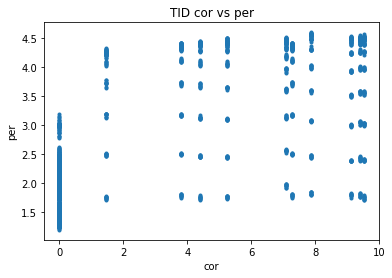

In [69]:
x = [correct_labels[i][0] for i in range(len(correct_labels))]
y = [predicted_labels[i][0] for i in range(len(predicted_labels))]

plt.plot(x, y, '.')
plt.title("TID cor vs per")
plt.xlabel("cor")
plt.ylabel("per")
plt.show()

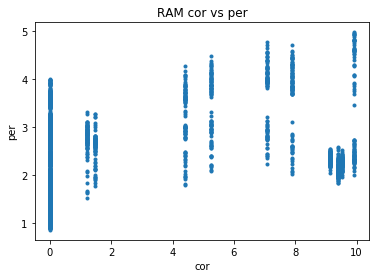

In [70]:
x = [correct_labels[i][1] for i in range(len(correct_labels))]
y = [predicted_labels[i][1] for i in range(len(predicted_labels))]

plt.plot(x, y, '.')
plt.title("RAM cor vs per")
plt.xlabel("cor")
plt.ylabel("per")
plt.show()